# Run the reactor sensitivity using our method

In [16]:
import sys
sys.path.append('/work/westgroup/ChrisB/_01_MeOH_repos/PES_plotter')
sys.path.append('/work/westgroup/ChrisB/_01_MeOH_repos/PES_plotter/PyEnergyDiagram')
import min_sbr
import pes_plot
import git
import time 
import cantera as ct
from rmgpy import chemkin
import rmgpy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# RMG model path that is being analyzed. cantera analysis have a folder name 
# based off of the commit message, hash, and date
# rmg_model_path = "/work/westgroup/ChrisB/_01_MeOH_repos/RMG_run_comparisons/bep_parameter_study/rmg_runs/meoh_main/"
rmg_model_path = "/work/westgroup/ChrisB/_01_MeOH_repos/meOH-synthesis/"

In [29]:
cti_file = rmg_model_path + "base/cantera/chem_annotated.cti"

gas = ct.Solution(cti_file)
surface = ct.Interface(cti_file, "surface1", [gas])

model_dict_file = rmg_model_path + "base/chemkin/species_dictionary.txt"
grabow_dict_file = "../RMG_model_analysis/species_data/species_dictionary.txt"

model_dict = chemkin.load_species_dictionary(model_dict_file)
grabow_dict = chemkin.load_species_dictionary(grabow_dict_file)

In [5]:
# make a dictionary to "translate" the names from the grabow model to ours
# irrespective of the naming convention.
spc_trans = {}
for name, entry in model_dict.items(): 
    for g_name, g_entry in grabow_dict.items():
        if entry.is_isomorphic(g_entry):
            # remove (#) so it is neater
            g_name_new = g_name.split("(", 1)[0]
            spc_trans.update({g_name_new :name})

# thermodynamic sensitivity

First, we will perturb the binding energy of HCOOH* and see how it affects out model. 

In [5]:
spc_trans

{'N2': 'N2',
 'Ne': 'Ne',
 'X': 'X(1)',
 'H2': 'H2(2)',
 'CO': 'CO(3)',
 'CO2': 'CO2(4)',
 'H2O': 'H2O(5)',
 'CH2O': 'CH2O(6)',
 'HCOOH': 'HCOOH(7)',
 'CH3OH': 'CH3OH(8)',
 'HCOOCH3': 'HCOOCH3(9)',
 'H*': 'H*(10)',
 'O*': 'O*(11)',
 'OH*': 'OH*(12)',
 'H2O*': 'H2O*(13)',
 'CO*': 'CO*(14)',
 'CO2*': 'CO2*(15)',
 'HCO*': 'HCO*(16)',
 'HCOO*': 'HCOO*(17)',
 'COOH*': 'COOH*(18)',
 'HCOOH*': 'HCOOH*(19)',
 'CH2O*': 'CH2O*(20)',
 'CH3O*': 'CH3O*(21)',
 'CH3O2*': 'CH3O2*(22)',
 'CH3OH*': 'CH3OH*(23)',
 'CH4': 'CH4(24)',
 'H2*': 'H2*(37)'}

N2
-0.13807338599376817
-0.03390671932710153
0.07025994733956517
0.17442661400623183
0.2785932806728985


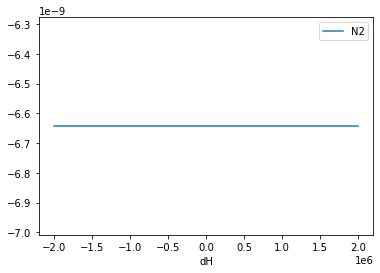

Ne
-0.1585656480811198
-0.05439898141445313
0.049767685252213555
0.1539343519188802
0.2581010185855469


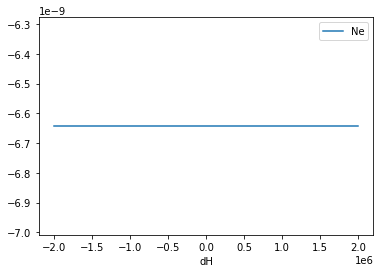

X(1)
-0.20833123353696
-0.10416456687029337
2.0997963733232444e-06
0.10416876646304
0.20833543312970662


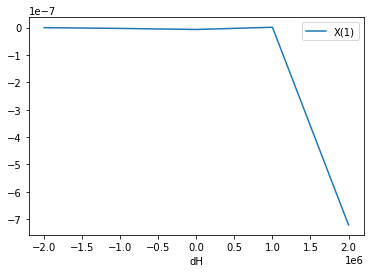

H2(2)
-0.1386593492653954
-0.03449268259872868
0.06967398406793798
0.17384065073460464
0.2780073174012713


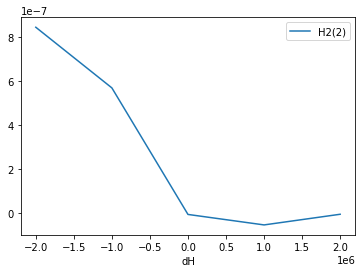

CO(3)
-1.284415047672959
-1.1802483810062923
-1.0760817143396255
-0.9719150476729591
-0.8677483810062924


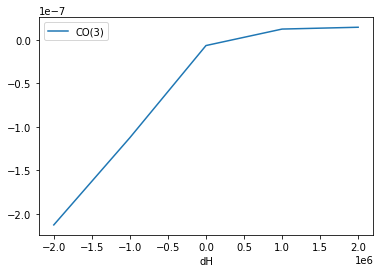

CO2(4)
-4.202663362150794
-4.098496695484127
-3.9943300288174606
-3.8901633621507945
-3.785996695484128


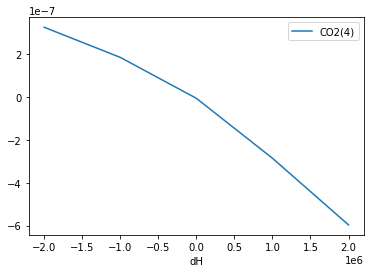

H2O(5)
-2.6449194636335327
-2.5407527969668657
-2.436586130300199
-2.3324194636335327
-2.2282527969668657


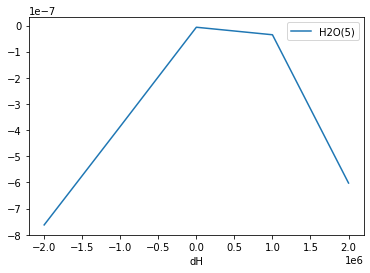

CH2O(6)
-1.2592255668620596
-1.1550589001953928
-1.050892233528726
-0.9467255668620594
-0.8425589001953929


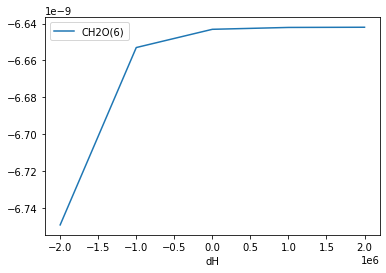

HCOOH(7)
-4.016763094223129
-3.9125964275564615
-3.8084297608897946
-3.704263094223128
-3.6000964275564615


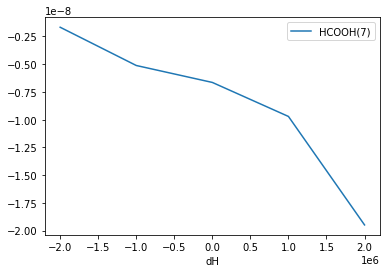

CH3OH(8)
-2.181876682806186
-2.0777100161395192
-1.9735433494728525
-1.8693766828061857
-1.7652100161395194


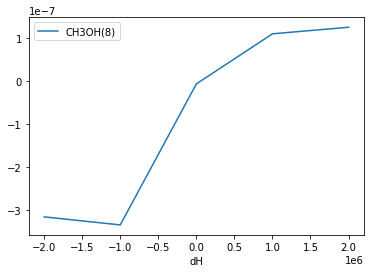

HCOOCH3(9)
-3.747500736146048
-3.6433340694793817
-3.5391674028127142
-3.435000736146048
-3.3308340694793817


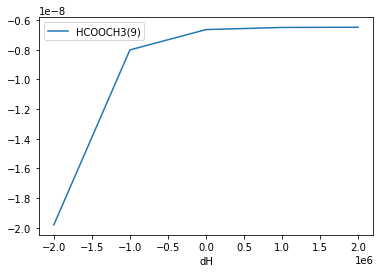

H*(10)
-0.2832804921438147
-0.17911382547714796
-0.07494715881048132
0.029219507856185354
0.133386174522852


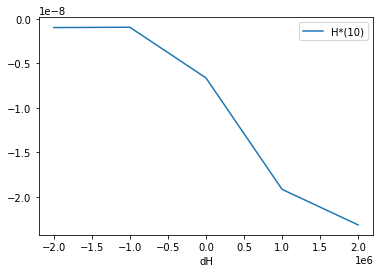

O*(11)
-2.017801826332035
-1.9136351596653685
-1.809468492998702
-1.7053018263320352
-1.6011351596653685


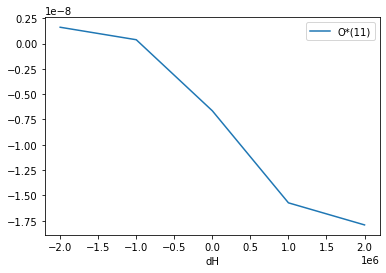

OH*(12)
-1.9422648838302206
-1.8380982171635543
-1.7339315504968875
-1.629764883830221
-1.5255982171635545


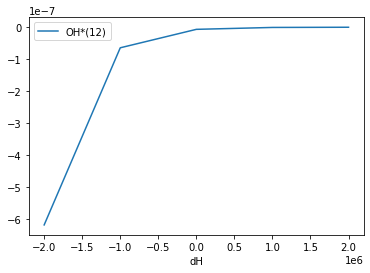

H2O*(13)
-2.8573556700404623
-2.753189003373796
-2.649022336707129
-2.544855670040462
-2.440689003373796


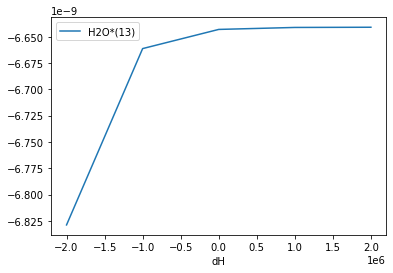

CO*(14)
-2.0069946439712756
-1.902827977304609
-1.7986613106379423
-1.6944946439712754
-1.5903279773046088


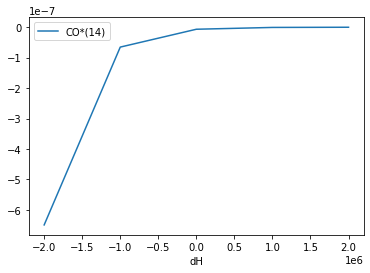

CO2*(15)
-4.144065039990955
-4.039898373324288
-3.9357317066576214
-3.8315650399909553
-3.727398373324288


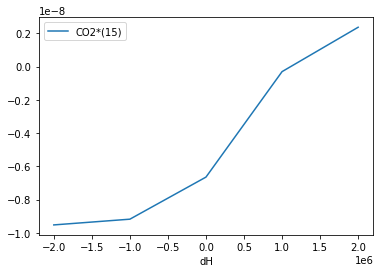

HCO*(16)
-1.9156814987731294
-1.8115148321064627
-1.7073481654397964
-1.6031814987731297
-1.4990148321064627


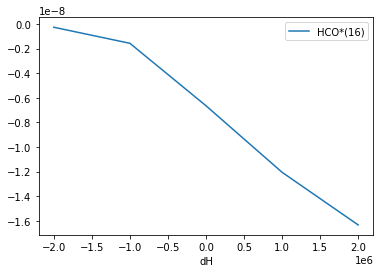

HCOO*(17)
-4.162620471249041
-4.058453804582374
-3.9542871379157076
-3.8501204712490407
-3.745953804582374


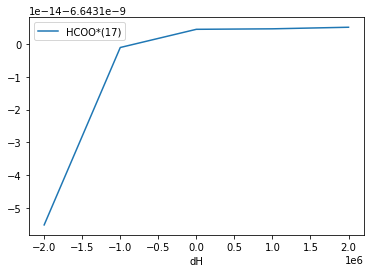

COOH*(18)
-4.024220824371527
-3.9200541577048607
-3.8158874910381932
-3.7117208243715267
-3.6075541577048607


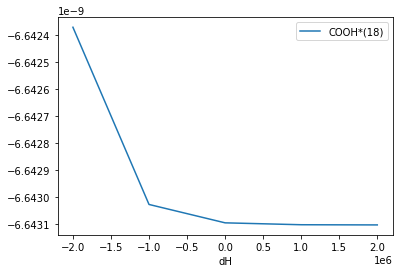

HCOOH*(19)
-4.5510549839415555
-4.4468883172748885
-4.342721650608222
-4.238554983941555
-4.1343883172748885


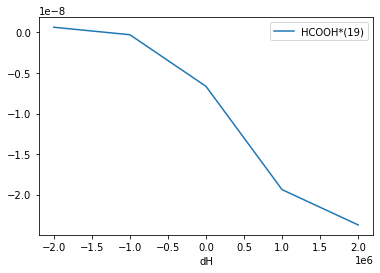

CH2O*(20)
-1.7819183475454874
-1.6777516808788207
-1.5735850142121544
-1.4694183475454874
-1.3652516808788209


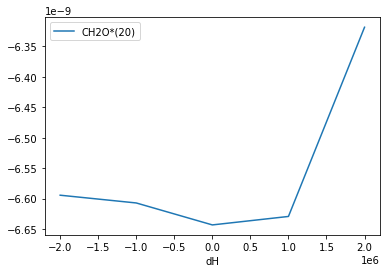

CH3O*(21)
-1.9196517205142383
-1.8154850538475713
-1.7113183871809052
-1.6071517205142383
-1.5029850538475713


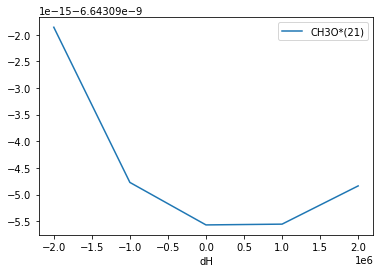

CH3O2*(22)
-4.01457390293612
-3.910407236269453
-3.8062405696027866
-3.7020739029361196
-3.597907236269453


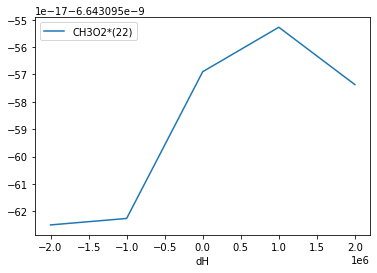

CH3OH*(23)
-2.6262768756088133
-2.5221102089421468
-2.41794354227548
-2.3137768756088137
-2.2096102089421468


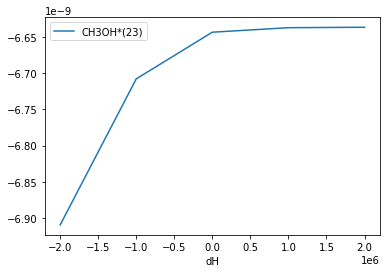

CH4(24)
-0.8858018227559095
-0.7816351560892428
-0.6774684894225761
-0.5733018227559096
-0.4691351560892429


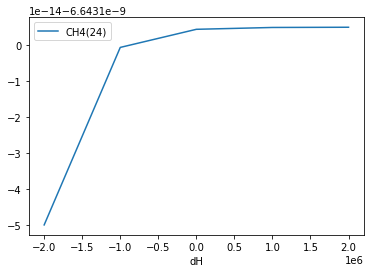

H2*(37)
-0.21490796313056792
-0.11074129646390124
-0.006574629797234568
0.09759203686943212
0.20175870353609873


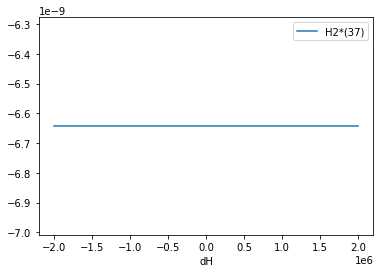

In [6]:
# set energy
energy = "off"

# reactor conditions
reactor_type = 1
energy = "off"
rtol=1.0e-11
atol=1.0e-22

# don't use grabow model
grabow = True

perturbations = [-2,-1,0,1,2]
dh_results = []

species = [spc_trans[spec] for spec in spc_trans.keys()]

for spec in species:
    print(spec)
    dh_results = []
    for dH in perturbations:
        # run to SS. if solver fails, change rtol and atol. 
        # initialize reactor
        sbr_ss = min_sbr.MinSBR(
            cti_file,
            rtol=rtol,
            atol=atol,
            reactor_type=reactor_type,
            energy=energy,
        )
        # change the thermo
        sbr_ss.alter_thermo(spec,dH*1e7)
        pert_results = sbr_ss.run_reactor_ss_memory()
        pert_results["dH"] = dH*1e6
        dh_results.append(pert_results.values())

    df = pd.DataFrame(dh_results, columns=pert_results.keys())    

    rxn_string = f'{spc_trans["CO*"]} + {spc_trans["OH*"]} <=> {spc_trans["COOH*"]} + {spc_trans["X"]} ROP [kmol/m^2 s]'
#     rxn_string = f'{spc_trans["COOH*"]} + {spc_trans["OH*"]} <=> {spc_trans["CO2*"]} + {spc_trans["H2O*"]} ROP [kmol/m^2 s]'
#     rxn_string = f'{spc_trans["CO2"]} + {spc_trans["X"]} <=> {spc_trans["CO2*"]} ROP [kmol/m^2 s]'
    rxn_string_TOF = rxn_string.replace("ROP [kmol/m^2 s]", "TOF")
    
    df[rxn_string_TOF] = df[rxn_string]/sbr_ss.surf.site_density
    df.plot(x ="dH", y= rxn_string_TOF, label = f"{spec}")
    plt.show()

### alter the thermo of the HCOOH and the COOH* species in tandem

-3.6000964275564615
-4.5510549839415555
-3.704263094223128
-4.4468883172748885
-3.8084297608897946
-4.342721650608222
-3.9125964275564615
-4.238554983941555
-4.016763094223129
-4.1343883172748885


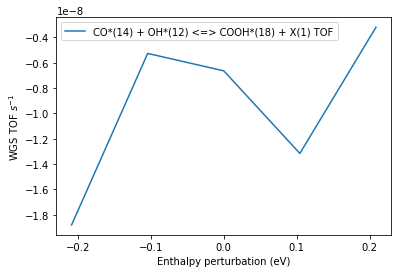

In [7]:
# set energy
energy = "off"

# reactor conditions
reactor_type = 1
energy = "off"
rtol=1.0e-11
atol=1.0e-22

# don't use grabow model
grabow = True

perturbations = [-2,-1,0,1,2]
dh_results = []

species = {
    spc_trans["HCOOH"]:-1, 
    spc_trans["HCOOH*"]:1
}



for dH in perturbations:
    # run to SS. if solver fails, change rtol and atol. 
    # initialize reactor
    sbr_ss = min_sbr.MinSBR(
        cti_file,
        rtol=rtol,
        atol=atol,
        reactor_type=reactor_type,
        energy=energy,
    )
    # change the thermo
    for spec,sign in species.items():
        sbr_ss.alter_thermo(spec,dH*sign*1e7)
        
    pert_results = sbr_ss.run_reactor_ss_memory()
    pert_results["dH"] = (dH*1e7)/(96* 1000**2)
    dh_results.append(pert_results.values())
    

df = pd.DataFrame(dh_results, columns=pert_results.keys())    

rxn_string = f'{spc_trans["CO*"]} + {spc_trans["OH*"]} <=> {spc_trans["COOH*"]} + {spc_trans["X"]} ROP [kmol/m^2 s]'
rxn_string_TOF = rxn_string.replace("ROP [kmol/m^2 s]", "TOF")

df[rxn_string_TOF] = df[rxn_string]/sbr_ss.surf.site_density
df.plot(x ="dH", 
        y= rxn_string_TOF, 
        ylabel = "WGS TOF $s^{-1}$",
        xlabel = "Enthalpy perturbation (eV)"
       )
plt.show()

In [6]:
for i in sbr_ss.surf.reaction_equations():
    if spc_trans["CO*"] in i and spc_trans["CO2*"] in i:
        print(i)

NameError: name 'sbr_ss' is not defined

<AxesSubplot:xlabel='dH'>

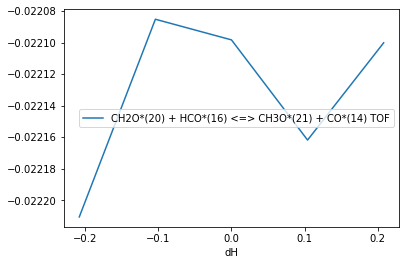

In [9]:
rxn_string = 'CH2O*(20) + HCO*(16) <=> CH3O*(21) + CO*(14) ROP [kmol/m^2 s]'
rxn_string_TOF = rxn_string.replace("ROP [kmol/m^2 s]", "TOF")
df[rxn_string_TOF] = df[rxn_string]/sbr_ss.surf.site_density

df.plot(x ="dH", y= rxn_string_TOF )

### example covdep entry:
{'O*(11)': (0.0, 0.0, -73220000.0)}

In [7]:
rxn_string = f'{spc_trans["CO2"]} + 2 {spc_trans["X"]} <=> {spc_trans["CO*"]} + {spc_trans["O*"]}'
rxn_index = surface.reaction_equations().index(rxn_string)

print(
    surface.reaction_equations()[rxn_index],
    surface.reactions()[rxn_index].rate,
    rxn_index
)
surface.set_multiplier(0, rxn_index)

CO2(4) + 2 X(1) <=> CO*(14) + O*(11) Arrhenius(A=0.02, b=0, E=4.184e+07) 19


In [8]:
rxn_string  = 'CO*(14) + O*(11) <=> CO2*(15) + X(1)'
rxn_index = surface.reaction_equations().index(rxn_string)
surface.set_multiplier(0, rxn_index)

In [6]:
# run to SS. if solver fails, change rtol and atol. 
# initialize reactor

# set energy
energy = "off"

# reactor conditions
reactor_type = 1
energy = "off"
rtol=1.0e-11
atol=1.0e-22

# don't use grabow model
grabow = True

sbr_ss = min_sbr.MinSBR(
    cti_file,
    rtol=rtol,
    atol=atol,
    reactor_type=reactor_type,
    energy=energy,
)

pert_results = sbr_ss.run_reactor_ss_memory()

In [7]:

rxn_string = f'{spc_trans["CO*"]} + {spc_trans["OH*"]} <=> {spc_trans["COOH*"]} + {spc_trans["X"]} ROP [kmol/m^2 s]'
rxn_string_TOF = rxn_string.replace("ROP [kmol/m^2 s]", "TOF")

pert_results[rxn_string_TOF] = pert_results[rxn_string]/sbr_ss.surf.site_density

In [8]:
pert_results[rxn_string_TOF]

-1.918099907778486e-08

In [9]:
pert_results[rxn_string]

-5.644968028592084e-16

In [33]:
! echo $PWD

/work/westgroup/ChrisB/_01_MeOH_repos/meOH-analysis/cantera_simulations/sensitivity


In [37]:
import os
os.get_path('')

AttributeError: module 'os' has no attribute 'get_path'

# get global effects of changing a rate rule

In [6]:
thermo_file = rmg_model_path + "base/chemkin/chem_annotated-surface.inp"
model_dict_file = rmg_model_path + "base/chemkin/species_dictionary.txt"

chmkn = chemkin.load_chemkin_file(
    thermo_file, 
    dictionary_path=model_dict_file, 
    transport_path=None, 
    read_comments=True, 
    thermo_path=None,
    use_chemkin_names=True, 
    check_duplicates=True, 
    generate_resonance_structures=True
)

In [ ]:
interest_species = {}
spec1 = model_dict[spc_trans["CO*"]]
spec2 = model_dict[spc_trans["CO2*"]]
#     for reac in chmkn[1][10].reactants:
for rxn in chmkn[1]:
    if (any(reac.is_isomorphic(spec1) for reac in rxn.reactants) and \
        any(reac.is_isomorphic(spec2) for reac in rxn.products)) or \
    (any(reac.is_isomorphic(spec2) for reac in rxn.reactants) and \
     any(reac.is_isomorphic(spec1) for reac in rxn.products)):
        # remove (#) so it is neater
         if "Estimated" in rxn.kinetics.comment:
            print(
                rxn.to_labeled_str(),
                "\n" + rxn.kinetics.comment,
                "\n" + rxn.to_chemkin(),
                "\n" + str(rxn.duplicate),
                "\n")
                

In [35]:
count = 0
libcount = 0
for rxn in chmkn[0]:
    if isinstance(rxn, rmgpy.data.kinetics.family.TemplateReaction):
#         print("famigly")
        count +=1
    elif isinstance(rxn, rmgpy.data.kinetics.library.LibraryReaction):
        libcount +=1
print("families: ", count, "\nlibraries: ", libcount)


families:  0 
libraries:  0


In [37]:
count = 0
libcount = 0
for rxn in chmkn[1]:
    if isinstance(rxn, rmgpy.data.kinetics.family.TemplateReaction):
#         print("famigly")
        count +=1
    elif isinstance(rxn, rmgpy.data.kinetics.library.LibraryReaction):
        libcount +=1
print("families: ", count, "\nlibraries: ", libcount)

        

families:  110 
libraries:  11


In [31]:
surface.n_reactions

121

## Identify problem families and problem rules
basically, any rule that is generating a disproportionate amount of reactions is suspect. 

In [80]:
est_rxn_dict = {}
for rxn in chmkn[1]:
    if isinstance(rxn, rmgpy.data.kinetics.family.TemplateReaction):
        if "Estimated" in rxn.kinetics.comment:
            if rxn.family in est_rxn_dict.keys():
                est_rxn_dict[rxn.family] += 1
            else: 
                est_rxn_dict[rxn.family] = 1

sorted_est_rxn_dict = dict(sorted(est_rxn_dict.items(), key = lambda kv: kv[1], reverse = True))
sorted_est_rxn_dict

{'Surface_Abstraction_Beta_double_vdW': 19,
 'Surface_Abstraction_Single_vdW': 16,
 'Surface_Abstraction_vdW': 12,
 'Surface_Adsorption_Dissociative': 7,
 'Surface_Adsorption_Abstraction_vdW': 7,
 'Surface_EleyRideal_Addition_Multiple_Bond': 5,
 'Surface_Dual_Adsorption_vdW': 5,
 'Surface_Adsorption_vdW': 4,
 'Surface_Migration': 1,
 'Surface_Adsorption_Dissociative_Double': 1}

In [88]:
sorted_rules_all = {}
for family in sorted_est_rxn_dict.keys(): 
    source_rules = {}
    for rxn in chmkn[1]:
        if isinstance(rxn, rmgpy.data.kinetics.family.TemplateReaction):
            if family in rxn.family:
                source_rules_str = ';'.join(rxn.template)
                if source_rules_str in source_rules.keys():
                    source_rules[source_rules_str] +=1
                else: 
                    source_rules[source_rules_str] =1
    sorted_rules_all[family] = source_rules

for family, rules in sorted_rules_all.items():
    print("\n", family)
    for rule, num in rules.items():
        print("\t {0:30s} : {1}".format(rule, num))


 Surface_Abstraction_Beta_double_vdW
	 C-H;OH                         : 3
	 O-H;OH                         : 1
	 C-H;Adsorbate1                 : 14
	 O-H;Adsorbate1                 : 5
	 Combined;Adsorbate1            : 2

 Surface_Abstraction_Single_vdW
	 Donating;*O-H                  : 1
	 C-OH;Abstracting               : 1
	 O-H;*O-H                       : 2
	 C-R;*O-H                       : 2
	 C-R;*O                         : 3
	 C-R;*C=R                       : 1
	 O-H;*C=R                       : 1
	 O-H;*O                         : 1
	 H-H;*O-H                       : 1
	 H-H;*O                         : 2
	 H-H;*C=R                       : 1

 Surface_Abstraction_vdW
	 AdsorbateVdW;*=O               : 2
	 AdsorbateVdW;*=C=R             : 1
	 O-C=R;*=O                      : 2
	 O-R;*=O                        : 4
	 C-R;*=O                        : 2
	 O-C-3R;*=O                     : 2
	 O-R;*=C=R                      : 3
	 C-OH;*=C=R                     : 2
	 C-R;*=C=R   

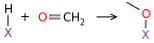

In [74]:
chmkn[1][15].template
chmkn[1][15]

### sandia sensitive  rxns
get most sensitive reactions

In [ ]:
---
reactions:
    reaction: O*(11) + HCO*(16) <=> OH*(12) + CO*(14)
    reaction_family: Surface_Abstraction
        
    reaction: O*(11) + H2X(53) <=> H*(10) + OH*(12)
    reaction_family: Surface_Abstraction_vdW
        
    reaction: X(1) + X(1) + HCOOH(7) <=> OH*(12) + HCO*(16)
    reaction_family: Surface_Adsorption_Dissociative
        
    reaction: H*(10) + CH2O*(20) <=> H2X(53) + HCO*(16)
    reaction_family: Surface_Abstraction_Single_vdW

    reaction: H*(10) + HCO*(16) <=> X(1) + CH2O*(20)
    reaction_family: Surface_Dissociation_vdW
        
    reaction: X(1) + X(1) + CH3OH(8) <=> H*(10) + CH3O*(21)
    reaction_family: Surface_Adsorption_Dissociative

    reaction: X(1) + X(1) + CO2(4) <=> O*(11) + CO*(14)
    reaction_family: Surface_Adsorption_Dissociative_Double

    reaction: H*(10) + CH2O*(20) <=> X(1) + CH3O*(21)
    reaction_family: Surface_Addition_Single_vdW

    reaction: H*(10) + CO2*(15) <=> X(1) + HCOO*(17)
    reaction_family: Surface_Addition_Single_vdW

    reaction: H*(10) + CO2(4) <=> COOH*(18)
    reaction_family: Surface_EleyRideal_Addition_Multiple_Bond

    reaction: CO2*(15) + HCO*(16) <=> CO*(14) + HCOO*(17)
    reaction_family: Surface_Adsorption_Abstraction_vdW

    reaction: HCO*(16) + CH2O*(20) <=> CO*(14) + CH3O*(21)
    reaction_family: Surface_Adsorption_Abstraction_vdW

    reaction: CO2*(15) + HCO*(16) <=> CO*(14) + COOH*(18)
    reaction_family: Surface_Adsorption_Abstraction_vdW

    reaction: OH*(12) + H2X(53) <=> H*(10) + H2O*(13)
    reaction_family: Surface_Abstraction_Single_vdW

    reaction: H*(10) + CO*(14) <=> X(1) + HCO*(16)
    reaction_family: Surface_Dissociation

    reaction: X(1) + X(1) + CH2O(6) <=> H*(10) + HCO*(16)
    reaction_family: Surface_Adsorption_Dissociative


In [89]:
sens_dict = {}
sensitivity_list = [
    'Surface_Abstraction',
    'Surface_Abstraction_vdW',
    'Surface_Adsorption_Dissociative',
    'Surface_Abstraction_Single_vdW',
    'Surface_Dissociation_vdW',
    'Surface_Adsorption_Dissociative',
    'Surface_Adsorption_Dissociative_Double',
    'Surface_Addition_Single_vdW',
    'Surface_Addition_Single_vdW',
    'Surface_EleyRideal_Addition_Multiple_Bond',
    'Surface_Adsorption_Abstraction_vdW',
    'Surface_Adsorption_Abstraction_vdW',
    'Surface_Adsorption_Abstraction_vdW',
    'Surface_Abstraction_Single_vdW',
    'Surface_Dissociation',
    'Surface_Adsorption_Dissociative',
]
for i in sensitivity_list:
    if i in sens_dict.keys():
        sens_dict[i] +=1
    else: 
        sens_dict[i] = 1
sens_dict

{'Surface_Abstraction': 1,
 'Surface_Abstraction_vdW': 1,
 'Surface_Adsorption_Dissociative': 3,
 'Surface_Abstraction_Single_vdW': 2,
 'Surface_Dissociation_vdW': 1,
 'Surface_Adsorption_Dissociative_Double': 1,
 'Surface_Addition_Single_vdW': 2,
 'Surface_EleyRideal_Addition_Multiple_Bond': 1,
 'Surface_Adsorption_Abstraction_vdW': 3,
 'Surface_Dissociation': 1}